# **Regression Excercise**

## **About this Exercise**

In this exercise, we will be using scikit-learn to implement simple linear regression. We download a dataset that is related to the calories and weight changes. The dataset is obtained from: https://www.kaggle.com/chrisbow/2018-calorie-exercise-and-weight-changes. We will split out data into 70% training set and 30% test set, create a model using the training set and evaluating the model using test set.

References:
1.   IBM Machine Learning Course on Cousera 
2.   For downloading Kaggle Datasets on Colab: https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235 



## **Simple Regression Exercise**

**Importing Needed Packages**

In [0]:
#matplotlib is a plotting library
import matplotlib.pyplot as plt
#pandas is a library used for data manipulation and analysis
import pandas as pd
#numpy is a library for scientific computing, with high level mathematical functions
import numpy as np
# import preprocessing module for standardisation of datasets 
from sklearn import preprocessing



**Downloading Data**

First, we will download some data from Kaggle. 

In [0]:
!pip install -U -q kaggle
!mkdir -p .kaggle
!mkdir -p ../root/.kaggle

# from google.colab import files
# files.upload()

username = 'charleneolive'
key = 'd155dd9049d3572a3190aa2a414e896b'

import json

token = {"username":username,"key":key}
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp .kaggle/kaggle.json ../root/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# !cp kaggle.json ~/.kaggle/
!cp .kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:

!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           5181  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25           3492  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           7223  
timoboz/stock-data-dow-jones                                 EOD data for all Dow Jones stocks                     2MB  2019-02-10 03:58:19           1130  
lava18/google-play-store-apps                             

In [0]:
!kaggle datasets download -d chrisbow/2018-calorie-exercise-and-weight-changes
!ls

  0% 0.00/1.94k [00:00<?, ?B/s]
100% 1.94k/1.94k [00:00<00:00, 1.59MB/s]
2018-calorie-exercise-and-weight-changes.zip  kaggle.json  sample_data


We then use pandas library to read the data by unzipping the file. 

In [0]:
data = pd.read_csv('2018-calorie-exercise-and-weight-changes.zip', compression='zip', header=0, sep=',', quotechar='"')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


Let's select certain features to see how they are correlated. In this case, let's select the total weight in ounces, and the number of calories, as well as the resultant change in weight.

In [0]:
cdf = data[['calories','change']]
cdf.head(10)

,calories,change
0,1950.0,-30.0
1,2600.0,8.0
2,2500.0,0.0
3,1850.0,-40.0
4,2900.0,14.0
5,3600.0,14.0
6,2400.0,-2.0
7,3100.0,6.0
8,2200.0,-8.0
9,1800.0,-40.0


We can then plot the features "calories" against weight change to see how linear the relationship is.

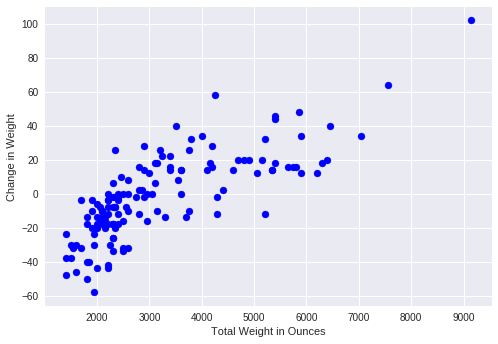

In [0]:
plt.scatter(cdf.calories, cdf.change,  color='blue')
plt.xlabel("Total Weight in Ounces")
plt.ylabel("Change in Weight")
plt.show()

##Creating the Training and Test Sets

We will split the dataset into 70% training and 30% testing sets, which are mutually exclusive. First, we will train with the training set. Next, we will evaluate our model with the test set, by calculating the mean squared error. The model should have no knowledge of the outcome of the test set, hence modelling real world data. 

Let's select data randomly.

Firstly, we will define a randoms seed. This ensures that the random combination used by the generator is constant: https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do 

In [0]:
np.random.seed(0)

In [0]:
#remove invalid data, as there are data where there are no records of calories & change
cdf = cdf[np.isfinite(cdf['calories'])]
cdf = cdf[np.isfinite(cdf['change'])]

msk = np.random.rand(len(cdf)) < 0.7
# len returns the number of items in a list
# np.random.rand creates an array with the length of the list and populate with random samples from uniform distribution over [0,1]
# you can view the docs here: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rand.html
# basically, we are selecting the rows that are less than 0.7 

#these rows will be the training set
train = cdf[msk]
#remaining rows will be the test set
test = cdf[~msk]

## **Simple Regression Model**

We will use sklearn to model data. scikit-learn is a machine learning library in python. 

In [0]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
# we will need to split the data into the dependent and independent variable.
#np.asanyarray convert list into an array
train_x = np.asanyarray(train[['calories']])

train_y = np.asanyarray(train[['change']])


In [0]:
# we will then train the model using training sets 
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01283168]]
Intercept:  [-43.86465047]


## **Plotting the Fit Line**

Plot the linear hypothesis. 


Text(0, 0.5, 'Change in Weight')

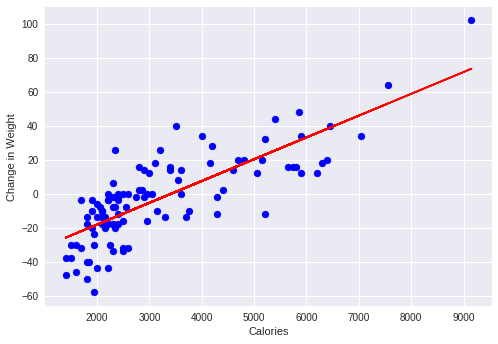

In [0]:
plt.scatter(train.calories, train.change,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Calories")
plt.ylabel("Change in Weight")

## **Evaluation**

We can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

1.   Mean absolute error: Mean of absolute value of errors.
2.   Mean squared Error (MSE): Mean of squared error. This increases contribution due to large errors.
3.   Root Mean Squared Error (RMSE): Square Root of Mean Square Error
4.   R-squared: Not an error, but a popular matrix. The higher the R-squared to 1, the closer the fit. R-squared is basically the percentage of response variable variation that is explained by a linear model. When it is 1, the model explains all the variability of response data around its mean. At 0, the model explains none of the variability of response data around its mean.

<img src="https://cdn-images-1.medium.com/max/1600/1*WCaWmRreXCQxLez4yYOy5w.png">



In [0]:
from sklearn.metrics import r2_score, mean_squared_error

# test with test set
test_x = np.asanyarray(test[['calories']])
test_y = np.asanyarray(test[['change']])
#used trained model to predict change in weight  
test_y_hat = regr.predict(test_x)

print("Mean squared error: %.2f" % mean_squared_error(test_y, test_y_hat))
print("R2-score: %.2f" % r2_score(test_y, test_y_hat) )

Mean squared error: 288.11
R2-score: 0.47


## **Exercise**


1.   Try this with Matlab this time. An exercise sheet with is provided for you.
2.   Try this exercise again  but with multiple features ("calories" and "weight_oz")to see how they are related to weight change.




[Suggested Solution for Question 2](https://gist.github.com/Charlene9698/dee9475c0aa7752618b7299ed5c679d3)

## **Polynomial Regression**

It could be better to model our data using polynomial regression. In the graph of change of weight against calories, it appears that the data follows a non-linear relationship. 

In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

We call all of these polynomial regression. where the relationship between independent variable x and dependent variable y is modeled as an nth degree polynomial in x. So let's say we wanna have a polynomial regression (2 degree polynomial)

$y = b + \theta_1  x + \theta_2 x^2$

A few additional features are created to fit the data into this model, 1, $x$, and $x^2$.

PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, calories. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2.

In this case, we generate a polynomial model to see the relation between calories and weight change.



In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

np.random.seed(0)

cdf = data[['calories','change']]
cdf.head(9)

# remove NaN Data 
cdf = cdf[np.isfinite(cdf['calories'])]
cdf = cdf[np.isfinite(cdf['change'])]

# split to training and test set
msk = np.random.rand(len(cdf)) < 0.7
train_x2 = cdf[msk]
test_x2 = cdf[~msk]

trainx2 = np.asanyarray(train_x2[['calories']])
trainy2 = np.asanyarray(train_x2[['change']])

testx2 = np.asanyarray(test_x2[['calories']])
testy2 = np.asanyarray(test_x2[['change']])


poly = PolynomialFeatures(degree=2)
# fit_transform fit the model to the data, then transform it. 
train_x_poly = poly.fit_transform(trainx2)
test_x_poly = poly.fit_transform(testx2)

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

For example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

We will standardise the data after generating the Polynomial features. To understand why, view:  https://medium.com/@samchaaa/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d

In [0]:
#standardisation of our features
# in this case, we use a Min-Max Standardisation
scaler = preprocessing.MinMaxScaler().fit(train_x_poly);
train_x_poly2=scaler.transform(train_x_poly);

test_x_poly2=scaler.transform(test_x_poly);

Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [0]:
# training our model with training set
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, trainy2)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.44425051e-02 -1.89584244e-07]]
Intercept:  [-46.61504469]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Weight Change')

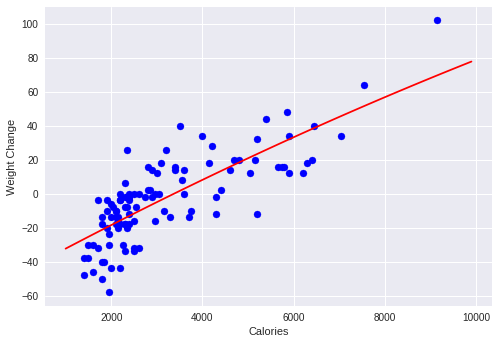

In [0]:
plt.scatter(trainx2, trainy2,  color='blue')
XX = np.arange(1000, 10000, 100)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Calories")
plt.ylabel("Weight Change")

We will now evaluate our model using r-squared and mean square error. 

In [0]:
from sklearn.metrics import r2_score, mean_squared_error
test_y_hat = clf.predict(test_x_poly)

print("Mean squared error: %.2f" % mean_squared_error(testy2, test_y_hat))
print("R2-score: %.2f" % r2_score(testy2,test_y_hat) )

Mean squared error: 280.02
R2-score: 0.48
